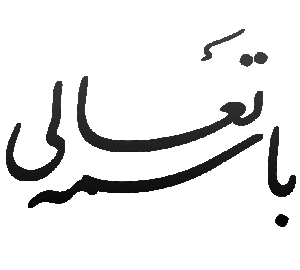

# inputs

In [ ]:
file_name = '"uptodate_parags_normd.txt"'
destination_name = '"dictionary_idf_en_df.pickle"'

# imports

In [3]:
import pandas as pd
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# make data ready

In [ ]:
from google.colab import drive
# The drive is mount because, it contains our data
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/MyDrive/
%cd NLP_Final_Project/data/normalized_data/
!ls

[Errno 2] No such file or directory: 'gdrive/MyDrive/'
/content/gdrive/MyDrive
/content/gdrive/MyDrive/NLP_Final_Project/data/normalized_data
bijankhan_parags_normd.txt   uptodate_parags_normd.txt
dictionary_idf_fa_df.pickle  wiki-fa_parags_normd.txt
old


In [ ]:
f = open(file_name, "r")
data = f.read()
data = data.split("\n")

In [ ]:
corpus = data

# main code

In [ ]:
# create vocabulary list, which is list of words, and we used set to force each word accure once
bagOfWords = []
for text in tqdm(corpus):
  bagOfWords.append(text.split(' '))
vocabulary = set([])
for i in tqdm(range(len(corpus))):
  vocabulary = vocabulary.union(set(bagOfWords[i]))

vocabulary = vocabulary.union(set(['Zzz']))
vocabulary = list(vocabulary)

#this pipline is the one, which mentioned in document and  its ioutput comprehance the "idf" for us
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer())]).fit(corpus)

idf__ = pipe['tfid'].idf_

In [ ]:
# a simple test:
try:
    print(idf__[vocabulary.index("drug")])
except:
    print("Zzzz")

3.602998399041376


In [ ]:
max(idf__),min(idf__)

(13.407383590534293, 1.056812411919901)

In [ ]:
dictionary_idf_en = {}

for i in range(len(vocabulary)):
    dictionary_idf_en[vocabulary[i]] = idf__[i] 

In [ ]:
dictionary_idf_en_df = pd.DataFrame(dictionary_idf_en.items(), columns=['word', 'idf'])

In [ ]:
dictionary_idf_en_df

,word,idf
0,,13.407384
1,wraps,9.089895
2,weilii,12.714236
3,alopeciaexamples,12.714236
4,swinging,9.973396
...,...,...
182244,splenosishydatid,12.714236
182245,keb,9.973396
182246,individualparticipation,12.714236
182247,alonepercutaneous,12.714236


In [ ]:
dictionary_idf_en_df.to_pickle(destination_name)